# SIR model

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

%matplotlib inline

## Model

This is a compartimental model as described in [C Witkowski and B Blais (2013), "Bayesian analysis of epidemics-zombies, influenza, and other diseases"](https://arxiv.org/abs/1311.6376)


The categories are:

* S: suceptibles
* I: infected
* R: recovered
* Q: quarantined
* D: dead
* AC: asymptomatic carriers

The transition diagram used is the following:

![]("transition.png")

In [2]:
def system_fun(y, t, alpha, beta, gamma, zeta, mu, nu, tau):
    """system function
    """
    S, I, R, Q, D, AC = y

    derivatives = [
        -nu * S * I + alpha * R - beta * (I + AC) * S,  # S
        beta * (I + AC) * S - (zeta + gamma * (S + AC + R) + mu) * I,  # I
        zeta * (I + Q) + tau * AC - alpha * R,  # R
        gamma * (S + AC + R) * I - (mu + zeta) * Q,  # Q
        mu * (I + Q),  # D
        nu * S * I - tau * AC,  # AC
    ]

    return derivatives

In [3]:
PARAMS = {"alpha": 0, "beta": 1, "gamma": 0, "zeta": 0.2, "mu": 0.01, "nu": 0, "tau": 0}
INIT_VALUES = {"S": 0.99, "I": 0.01, "R": 0, "Q": 0, "D": 0, "AC": 0}


def solve(init_values=INIT_VALUES, model_params=PARAMS):
    """Return simulation result
    """
    y0 = [init_values[key] for key in ("S", "I", "R", "Q", "D", "AC")]
    t = np.linspace(0, 100, 10000)
    fun = lambda y, t: system_fun(y, t, **model_params)
    soln = odeint(fun, y0, t)

    return soln

In [4]:
def zombie_plot(init_values=INIT_VALUES, model_params=PARAMS):
    """Plot simulation
    """
    soln = solve(init_values, model_params)
    df = pd.DataFrame(
        soln,
        columns=(
            "Susceptibles",
            "Infected",
            "Recovered",
            "Quarantined",
            "Dead",
            "Asymptomatic carriers",
        ),
    )
    df.plot(figsize=(12, 7))

## SIR with low death rate

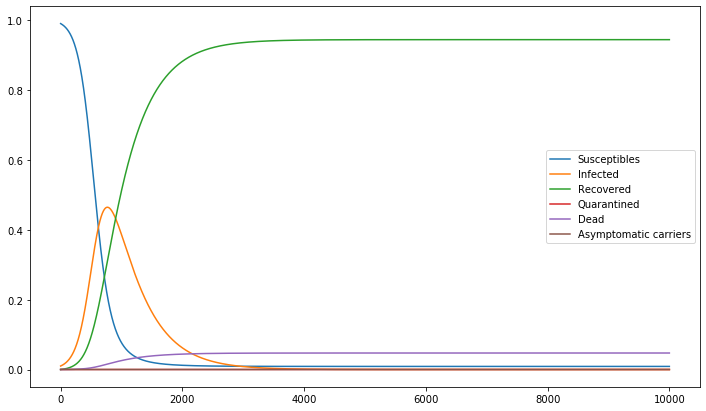

In [5]:
zombie_plot()

almost everyone is infected and recover

## Low recovery rate

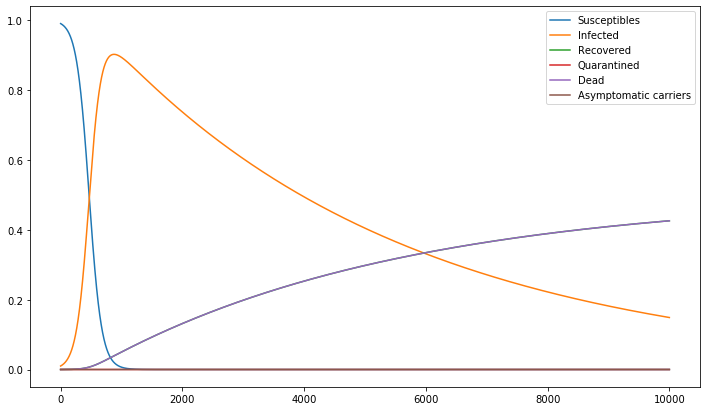

In [6]:
params = PARAMS.copy()
params["zeta"] = 0.01
zombie_plot(model_params=params)

More dead people than recovered.

## with asymptomatic carriers

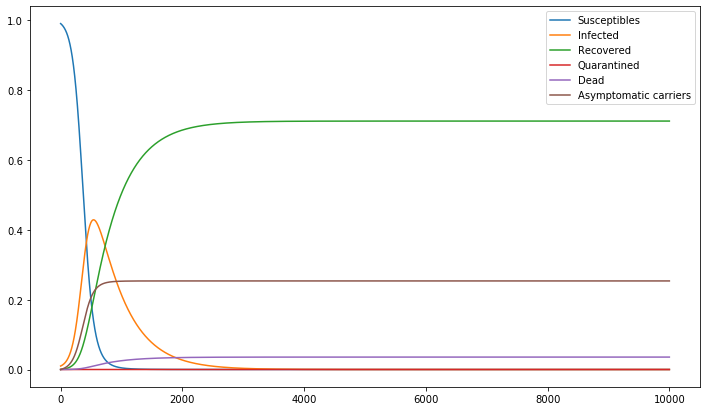

In [7]:
params = PARAMS.copy()
params.update({"nu": 0.5})
zombie_plot(model_params=params)

## with quarantine

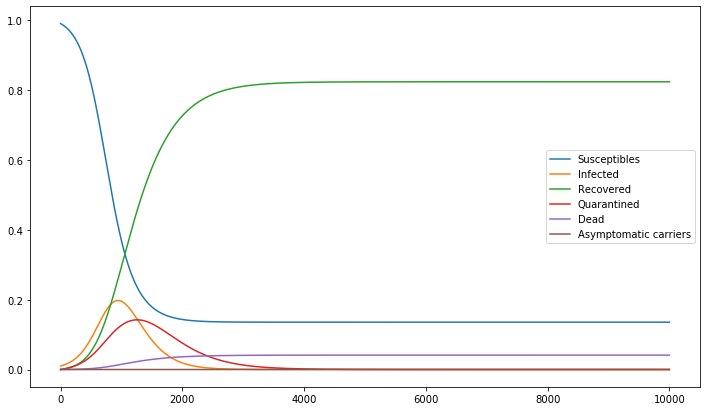

In [8]:
params = PARAMS.copy()
params.update({"gamma": 0.3})
zombie_plot(model_params=params)

infected are now divided into 2 waves

## with everything

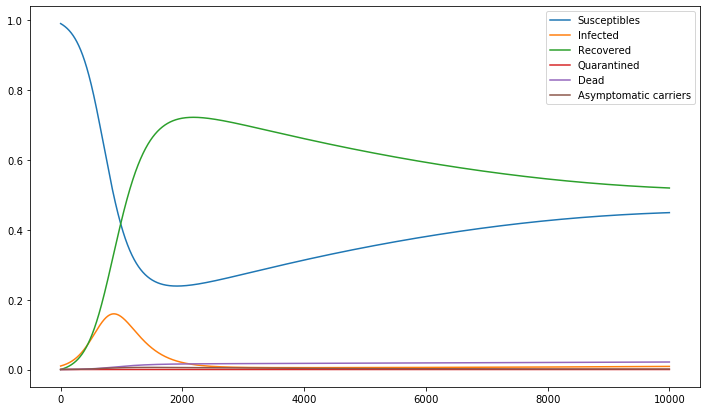

In [9]:
params = {
    "alpha": 0.01,
    "beta": 1,
    "gamma": 0,
    "zeta": 0.5,
    "mu": 0.01,
    "nu": 0.01,
    "tau": 0.03,
}
zombie_plot(model_params=params)

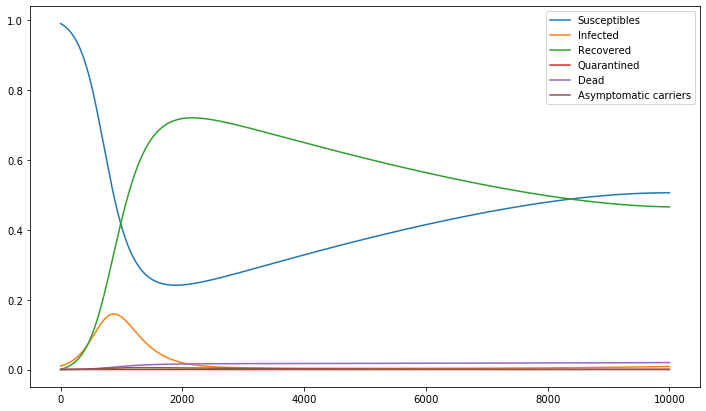

In [10]:
params = {
    "alpha": 0.01,
    "beta": 1,
    "gamma": 0,
    "zeta": 0.5,
    "mu": 0.01,
    "nu": 0.01,
    "tau": 0.05,
}
zombie_plot(model_params=params)

even if the number of AC is small, the outcome is sensible to there immune capacity.